# Regularized Linear Regression and Bias V.S. Variance

### Python Implementation

## Regularized Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias vs. variance.

The dataset contains historical records on the change in the water level,$x$ , and the amount of water flowing out of the dam, $y$. This dataset is divided into three parts:
        1. A training set that your model will learn on: X, y
        2. A cross validation set for determining the regularization parameter: Xval, yval
        3. A test set for evaluating performance. These are 'unseen' examples which your model did not see during training: Xtest, ytest

In [2]:
data = loadmat('ex5data1.mat')
X,y = data['X'], data['y'].flatten()
Xval,yval = data['Xval'], data['yval'].flatten()
Xtest,ytest = data['Xtest'], data['ytest'].flatten()

### Visualizing the data

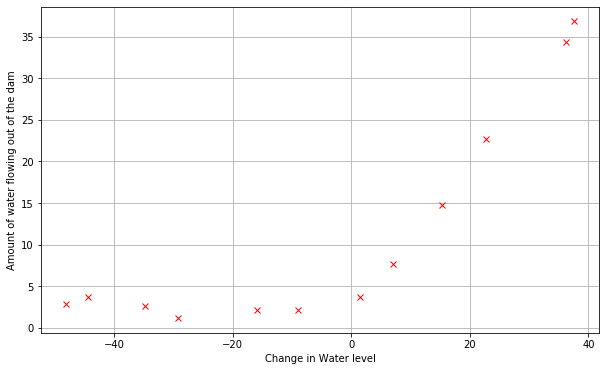

In [3]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'rx')
plt.grid()
plt.xlabel("Change in Water level")
plt.ylabel("Amount of water flowing out of the dam")
plt.show()

 ### Regularized linear regression cost function

$J(\theta) = {1 \over 2m} \left[ \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^n \theta_j^2 \right]$

Where
1. $\lambda \sum_{i=1}^n \theta_j^2$ is the regularization term
2. $\lambda$  is the regularization parameter which controls the degree of regularization (thus, helps preventing overtting).

The regularization term puts a penalty on the overall cost $J$ . As the magnitudes of the model parameters $\theta_j$ increase,the penalty increases as well. Note that you should not regularize the $\theta_0$ term

In [4]:
def cost(theta, X,y,lam):
    X = np.insert(X,0,1,axis=1)
    m=X.shape[0]
    theta = theta.ravel()
    J = 1/(2*m) * np.sum((X.dot(theta)-y)**2) + lam/(2*m) * np.sum(theta[1:]**2)
    return J

In [5]:
def gradient(theta,X,y,lam):
    X = np.insert(X,0,1,axis=1)
    theta = theta.ravel()
    m=X.shape[0]
    grad = (1/m)*(X.T.dot(X.dot(theta)-y))
    grad[1:] += (lam/m)*theta[1:]
    return grad

In [6]:
theta = np.ones((2,1))
J = cost(theta,X,y,1)
grad = gradient(theta,X,y,1)
print('Cost at theta = [1 ; 1]: %0.2f'%(J)) #303.99
print('Gradient at theta = [1 ; 1]:', grad) #-15.30, 598.25

Cost at theta = [1 ; 1]: 303.99
Gradient at theta = [1 ; 1]: [-15.30301567 598.25074417]


### Fitting linear regression

He we use scipy optimize function to train our Linear regression classifier

In [7]:
def trainLinearReg(X,y,lam):
    theta = np.zeros(X.shape[1]+1)
    params = optimize.minimize(fun=cost, x0=theta, args=(X, y, lam),
                            method='CG', jac=gradient)
    return params.x

We set regularization parameter $\lambda$ to zero because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension

In [8]:
#train with lambda set to zero
lam = 0
theta = trainLinearReg(X,y,lam)
print(theta)

[13.08790351  0.36777923]


Visualize the line of best fit

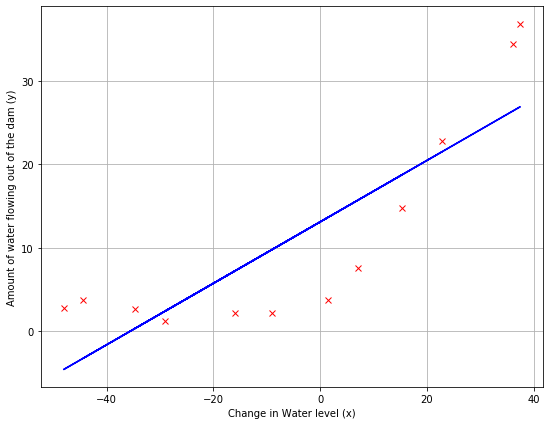

In [9]:
h = lambda x: x.dot(theta) #hypothesis
Xtrain = np.insert(X,0,1, axis=1)
plt.figure(figsize=(9,7))
plt.plot(X,y,'rx') # scatter plot
plt.plot(X,h(Xtrain),'r-', color='blue') #line of best fit
plt.grid()
plt.xlabel("Change in Water level (x)")
plt.ylabel("Amount of water flowing out of the dam (y)")
plt.show()

### Bias-variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit the training data. Ploting training and test errors on a learning curve is usefull in diagnosing bias-variance problems.

LearningCurves returns a vector of errors for the training set and cross validation set.

In [10]:
def learningCurves(X,y,Xval,yval,lam):
    error_train=[]
    error_val = []
    for i in range(X.shape[0]):
        Xtrain = X[:i+1]
        ytrain = y[:i+1]
        theta = trainLinearReg(Xtrain,ytrain,lam)
        error_train.append(cost(theta,Xtrain,ytrain,0))
        error_val.append(cost(theta,Xval,yval,0))
    return error_train,error_val

In [11]:
error_train, error_val = learningCurves(X,y,Xval,yval,0)

In [12]:
print(error_train[:5])
print(error_val[:5])

[3.944304526105059e-31, 6.409494854920721e-31, 3.286595045501875, 2.8426776893997996, 13.154048809153682]
[205.1210957454735, 110.30036610764692, 45.01023181029022, 48.36891136981957, 35.865141122260376]


In [13]:
def plotLearningCurve(error_train,error_val,title):
    training_examples = np.arange(X.shape[0])
    plt.figure(figsize=(10,6))
    plt.plot(training_examples,error_train,label='Train', color='blue')
    plt.plot(training_examples,error_val,label='Cross Validation', color='green')
    plt.title(title)
    plt.xlabel("Number of training examples")
    plt.ylabel("Error")
    plt.legend()
    plt.grid()
    plt.show()

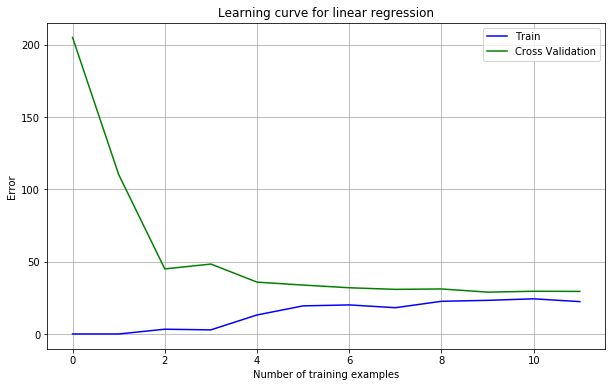

In [14]:
plotLearningCurve(error_train,error_val,"Learning curve for linear regression")

In [15]:
print("# Training Examples\t Train Error \t\t Cross Validation Error")
for i in range(1,13):
    print(f"\t{i}\t\t{error_train[i-1]}\t{error_val[i-1]}\n")

# Training Examples	 Train Error 		 Cross Validation Error
	1		3.944304526105059e-31	205.1210957454735

	2		6.409494854920721e-31	110.30036610764692

	3		3.286595045501875	45.01023181029022

	4		2.8426776893997996	48.36891136981957

	5		13.154048809153682	35.865141122260376

	6		19.443962512506577	33.82995681839218

	7		20.098521655093727	31.970986784792274

	8		18.172858695200027	30.862446323779785

	9		22.609405424954726	31.13599795502482

	10		23.261461592611813	28.93620746825012

	11		24.317249588044156	29.551431621997953

	12		22.373906495108905	29.43381812994268



It is clear from the curve that simple linear regression lead to underfitting and thus the model is too simplistic

##  Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias) This problem will be adressed by adding more features. For use polynomial regression, our hypothesis has the form:

$$h_\theta(x) =\theta_0+\theta_1\ast (waterLevel)+\theta_2*(waterLevel)^2+\cdots+\theta_p\ast (waterLevel)^p \\\qquad\;=\theta_0+\theta_1 x_1+\theta_2 x_2+\cdots+\theta_p x_p$$


Notice that by defining $x_1 = (\text{waterLevel}), x_2 = (\text{waterLevel)}^2,\ldots,x_p = (\text{waterLevel})^p$, we obtain a linear regression model where the features are the various powers of the original value (waterLevel).

In [16]:
def polyFeatures(X,p):
    X_poly = np.power(X, np.arange(1,p+1))
    return X_poly

We will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, it will not work well as the features would be badly scaled (e.g., an example with $x = 40$  will now have a feature $x_8 = 40^8 = 6:5\times 10^{12}$ ) Therefore, we will need to use feature normalization

In [17]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X, ddof=1,axis=0)
    X_norm = (X-mu)/sigma
    return X_norm,mu,sigma

In [18]:
p=8

In [19]:
#Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X,p)
X_poly, mu, sigma = featureNormalize(X_poly)

In [20]:
#Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma

In [21]:
# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma

In [22]:
X_poly[0]

array([-0.36214078, -0.75508669,  0.18222588, -0.70618991,  0.30661792,
       -0.59087767,  0.3445158 , -0.50848117])

In [23]:
def plotFit(theta,title):
    plt.figure(figsize=(10,6))
    plt.plot(X,y,'rx')
    plt.grid()
    plt.title(title)
    plt.xlabel("Change in Water level")
    plt.ylabel("Amount of water flowing out of the dam")
    
    #plot curve of best fit
    X_plot = np.linspace(X.min(), X.max())[:, np.newaxis]
    #Normalize
    X_plot_poly = polyFeatures(X_plot, p)
    X_plot_poly = (X_plot_poly - mu) / sigma
    X_plot_poly = np.insert(X_plot_poly,0,1,axis=1)
    
    plt.plot(X_plot, h(X_plot_poly),'b--')
    plt.show()

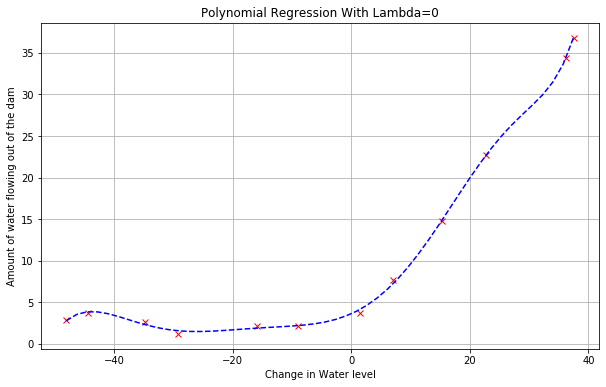

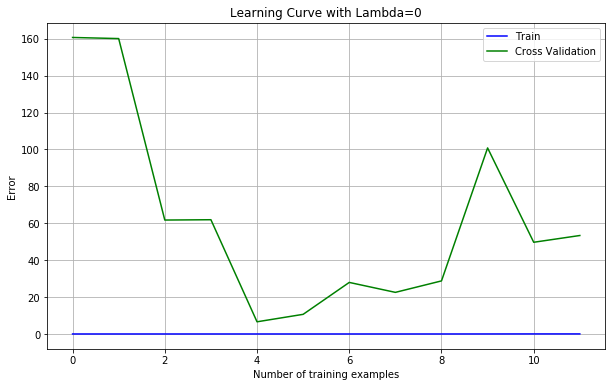

In [24]:
lam = 0
theta = trainLinearReg(X_poly,y,0)
plotFit(theta,'Polynomial Regression With Lambda=0')
error_train, error_val = learningCurves(X_poly, y, X_poly_val, yval, 0)
plotLearningCurve(error_train, error_val,'Learning Curve with Lambda=0')

To better understand the problems with the unregularized $\lambda = 0$ model, you can see that the learning curve shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem. One way to combat the overfitting (high-variance) problem is to add regularization to the model

 ### Optional: Adjusting the regularization parameter

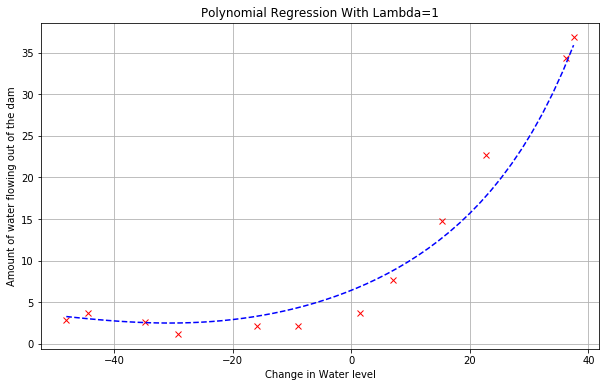

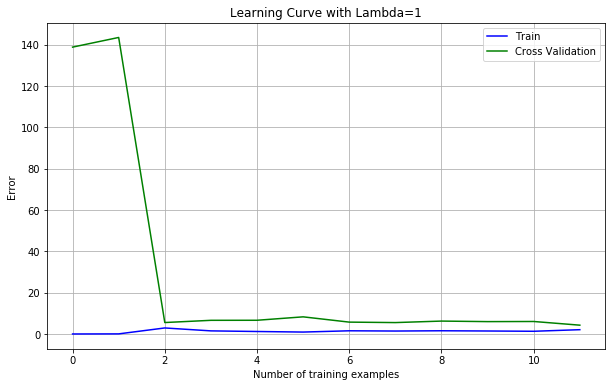

In [25]:
lam = 1
theta = trainLinearReg(X_poly,y,lam)
error_train, error_val = learningCurves(X_poly, y, X_poly_val, yval, lam)
plotFit(theta,'Polynomial Regression With Lambda=1')
plotLearningCurve(error_train, error_val,'Learning Curve with Lambda=1')

For $\lambda= 1$ , we see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows the  $\lambda= 1$ regularized polynomial regression model does not have the high bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

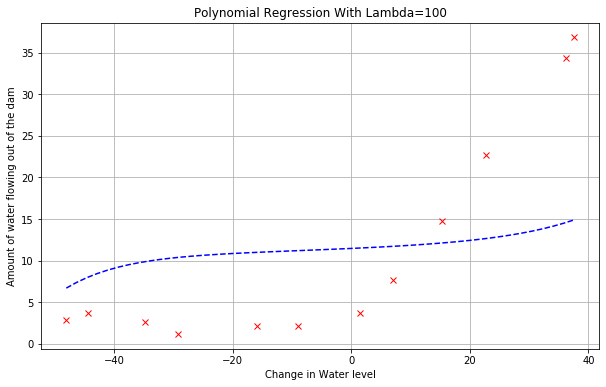

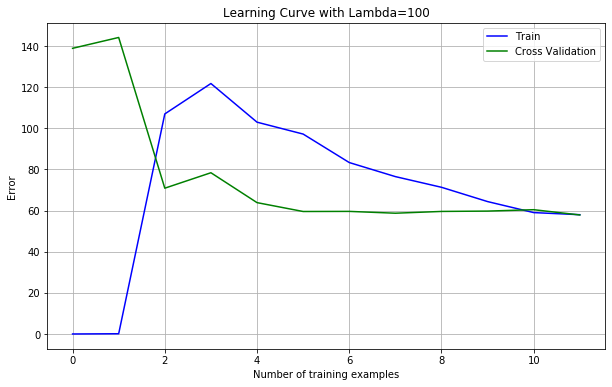

In [26]:
lam = 100
theta = trainLinearReg(X_poly,y,lam)
error_train, error_val = learningCurves(X_poly, y, X_poly_val, yval, 100)
plotFit(theta,'Polynomial Regression With Lambda=100')
plotLearningCurve(error_train, error_val,'Learning Curve with Lambda=100')

For $\lambda = 100$ , we see a polynomial fit that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

### Selecting lambda using a cross validation set

The value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda = 0$) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda = 100$)  does not fit the training set and testing set well. A good choice of  (e.g. $\lambda = 1$ ) can provide a good fit to the data.

To do this we use a cross validation set to evaluate how good each  value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data

The trainLinearReg function will try $\lambda$ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10} and compute the training error and cross validation error

In [27]:
def validationCurve(X,y,Xval,yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = []
    error_val = []
    for lam in lambda_vec:
        theta = trainLinearReg(X,y,lam)
        error_train.append(cost(theta,X,y,lam))
        error_val.append(cost(theta,Xval,yval,lam))
    return lambda_vec, error_train,error_val

In [28]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

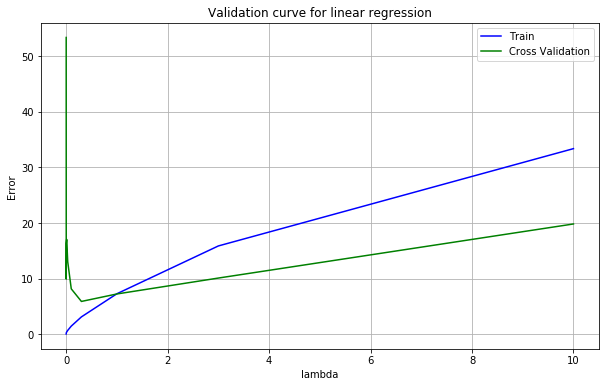

In [29]:
plt.figure(figsize=(10,6))
plt.plot(lambda_vec, error_train, label="Train",color='blue')
plt.plot(lambda_vec, error_val, label="Cross Validation",color='green')
plt.title("Validation curve for linear regression")
plt.xlabel("lambda")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

In this figure, we can see that the best value of $\lambda$ is around 3. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error. 

### Computing test set error

It is important to evaluate the 'final' model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\Theta$).

The test error should be computed using the best value of $\lambda$ found in our cross validation

In [30]:
best_lam = lambda_vec[np.argmin(error_val)]
print('The best lambda is',best_lam)

The best lambda is 3


In [31]:
theta = trainLinearReg(X_poly,y,best_lam)
J = cost(theta,X_poly_test,ytest,best_lam)
print(J)

3.1352976366432537
